[[52.22846911 20.99976389]
 [52.27956993 20.94625817]
 [52.24471656 21.08074594]
 [52.2004124  20.9512218 ]
 [52.27175348 21.02439922]
 [52.18103245 21.00952527]]


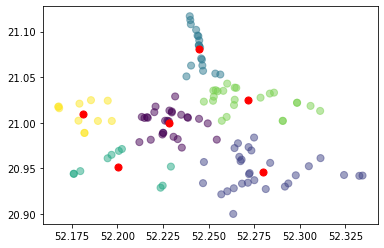

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from mwprojekt.velocity_analytics import compute_velocity

int_1 = pd.read_json('../tests/data_tests/test_0.json')
int_1 = pd.json_normalize(int_1['result'])
int_2 = pd.read_json('../tests/data_tests/test_1.json')
int_2 = pd.json_normalize(int_2['result'])

df = compute_velocity(int_1, int_2)
df = df.dropna()


  
df = pd.DataFrame(df,columns=['Lat_x','Lon_y'])

kmeans = KMeans(n_clusters=6).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['Lat_x'], df['Lon_y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
#todo legendam czerowne kropki 
#linia ktora najwiecej razy przekrasza